# Exercise 9-1: Analyze time-series data

In [1]:
import pandas as pd
import seaborn as sns

In [11]:
stockData = pd.read_pickle('stocks.pkl')
stockData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


In [12]:
# display the first five rows
stockData.head()

,Date,Open,High,Low,Close
0,2020-01-02,74.059998,75.150002,73.797501,75.087502
1,2020-01-03,74.287498,75.144997,74.125000,74.357498
2,2020-01-06,73.447502,74.989998,73.187500,74.949997
3,2020-01-07,74.959999,75.224998,74.370003,74.597504
4,2020-01-08,74.290001,76.110001,74.290001,75.797501


## Generate date ranges

In [4]:
# generate a daterange for every other day in the year 2020
every_other_day = pd.date_range(start='2020/01/01', end='2020/12/31', freq='2D')
every_other_day

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-05', '2020-01-07',
               '2020-01-09', '2020-01-11', '2020-01-13', '2020-01-15',
               '2020-01-17', '2020-01-19',
               ...
               '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-18',
               '2020-12-20', '2020-12-22', '2020-12-24', '2020-12-26',
               '2020-12-28', '2020-12-30'],
              dtype='datetime64[ns]', length=183, freq='2D')

In [7]:
# generate a daterange for every 3 hours in 2020
every_3hours = pd.date_range(start='2020/01/01', end='2020/12/31 23:59', freq='3H')
every_3hours

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:00:00',
               '2020-01-01 06:00:00', '2020-01-01 09:00:00',
               '2020-01-01 12:00:00', '2020-01-01 15:00:00',
               '2020-01-01 18:00:00', '2020-01-01 21:00:00',
               '2020-01-02 00:00:00', '2020-01-02 03:00:00',
               ...
               '2020-12-30 18:00:00', '2020-12-30 21:00:00',
               '2020-12-31 00:00:00', '2020-12-31 03:00:00',
               '2020-12-31 06:00:00', '2020-12-31 09:00:00',
               '2020-12-31 12:00:00', '2020-12-31 15:00:00',
               '2020-12-31 18:00:00', '2020-12-31 21:00:00'],
              dtype='datetime64[ns]', length=2928, freq='3H')

In [8]:
# generate a date range for every other Friday in 2020
every_other_friday = pd.date_range(start='2020/01/01', end='2020/12/31', freq='2W-FRI')
every_other_friday

DatetimeIndex(['2020-01-03', '2020-01-17', '2020-01-31', '2020-02-14',
               '2020-02-28', '2020-03-13', '2020-03-27', '2020-04-10',
               '2020-04-24', '2020-05-08', '2020-05-22', '2020-06-05',
               '2020-06-19', '2020-07-03', '2020-07-17', '2020-07-31',
               '2020-08-14', '2020-08-28', '2020-09-11', '2020-09-25',
               '2020-10-09', '2020-10-23', '2020-11-06', '2020-11-20',
               '2020-12-04', '2020-12-18'],
              dtype='datetime64[ns]', freq='2W-FRI')

## Reindex the data

In [13]:
# set an index on the date column for the stock data
stockData.set_index('Date', inplace=True)
stockData.head()

,Open,High,Low,Close
Date,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-06,73.447502,74.989998,73.187500,74.949997
2020-01-07,74.959999,75.224998,74.370003,74.597504
2020-01-08,74.290001,76.110001,74.290001,75.797501


In [15]:
# reindex the data so the data contains only Fridays 
# and assign the result to a variable called stockDataFridays
fridays = pd.date_range(start='2020/01/01', end='2020/12/31', freq='W-FRI')

stockDataFridays = stockData.reindex(fridays)
stockDataFridays.head()

,Open,High,Low,Close
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-10,77.650002,78.167503,77.062500,77.582497
2020-01-17,79.067497,79.684998,78.750000,79.682503
2020-01-24,80.062500,80.832497,79.379997,79.577499
2020-01-31,80.232498,80.669998,77.072502,77.377502


<AxesSubplot:>

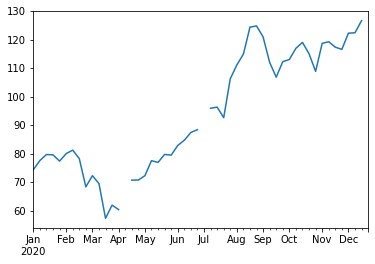

In [17]:
# use Pandas to plot the Close column of the reindexed data
stockDataFridays['Close'].plot()

## Resample the data

In [20]:
# downsample the data to a monthly frequency
stockDataFridays = stockDataFridays.resample(rule='M').mean()
stockDataFridays.head()

,Open,High,Low,Close
2020-01-31,78.259999,78.899999,77.278000,77.715500
2020-02-29,76.436875,78.015001,75.482500,76.961874
2020-03-31,65.426250,67.402501,63.076876,65.248750
2020-04-30,67.057502,67.971668,66.069165,67.264999
2020-05-31,76.363001,77.881500,76.108501,77.187001


<AxesSubplot:>

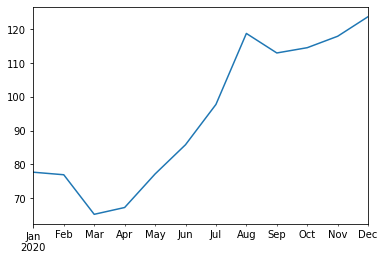

In [21]:
# use Pandas to plot the Close column of the resampled data
stockDataFridays['Close'].plot()

## Compute a rolling window

In [ ]:
# compute a 2 week rolling average for the Close column
# set the min_periods to 1 and assign the data to a variable called stocksRolling

In [ ]:
# use Pandas to plot the Close column of the rolling data